<a href="https://colab.research.google.com/github/Nahom32/Energy-Consumption-Forecasting/blob/main/notebooks/sequence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports for preprocessing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
path = "/content/drive/MyDrive/household_power_consumption.txt"
df = pd.read_csv(
    path,
    sep=';',
    low_memory=False,
    na_values=['?'],
    parse_dates={'Datetime': ['Date', 'Time']},
    infer_datetime_format=True
)


In [21]:
df.describe()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [22]:
print(df.shape)

(2075259, 8)


In [23]:
df.set_index('Datetime', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(method='ffill', inplace=True)
df = df.resample('H').mean()

# Feature engineering: Add time-based features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [24]:

print(df.shape)

(34589, 11)


In [25]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month,is_weekend
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.086200,0.123326,240.841505,4.604360,1.110951,1.287914,6.416515,11.501084,2.998959,6.450548,0.285380
std,0.894942,0.067221,2.999127,3.746337,3.518498,4.168720,7.344718,6.922394,2.000072,3.415879,0.451602
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.341267,0.077667,239.197167,1.510000,0.000000,0.000000,0.650000,6.000000,1.000000,3.000000,0.000000
50%,0.799533,0.106767,240.984500,3.406667,0.000000,0.333333,1.650000,12.000000,3.000000,6.000000,0.000000
75%,1.574967,0.149367,242.691833,6.583333,0.000000,0.650000,14.083333,18.000000,5.000000,9.000000,1.000000
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000,23.000000,6.000000,12.000000,1.000000


In [26]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month,is_weekend
Datetime,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,12,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,12,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,12,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,12,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,12,1


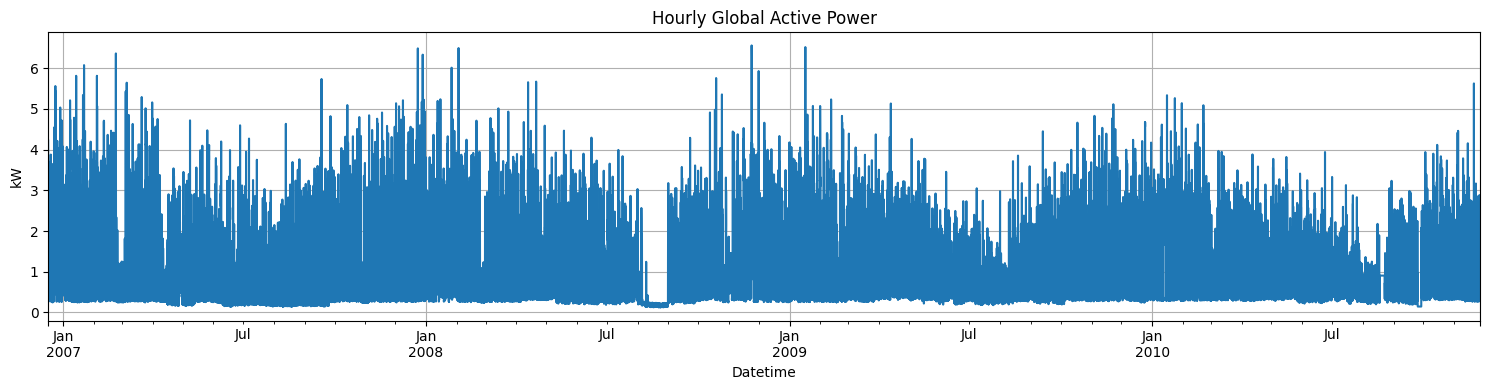

In [27]:
plt.figure(figsize=(15, 4))
df['Global_active_power'].plot(title='Hourly Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('kW')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Selection and Scaling


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
all_features = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
time_features = ['hour', 'dayofweek', 'month', 'is_weekend']

features = all_features + time_features
target_column = 'Global_active_power'
df = df[features]

In [29]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df),
    columns=features,
    index=df.index
)

In [30]:
def create_sequences(data, window_size=24, horizon=1):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        x_i = data.iloc[i:i+window_size].values
        y_i = data.iloc[i+window_size + horizon - 1][0]  # Predict Global_active_power
        X.append(x_i)
        y.append(y_i)
    return np.array(X), np.array(y)

WINDOW_SIZE = 24
HORIZON = 1
X, y = create_sequences(scaled_df, window_size=WINDOW_SIZE, horizon=HORIZON)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [32]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (27652, 24, 11)
y_train shape: (27652,)


# Sequence Generation plot

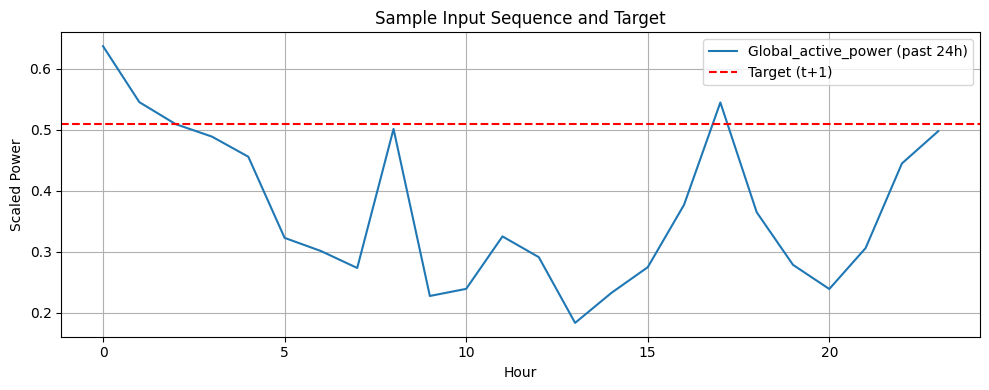

In [33]:
sample_idx = 0
plt.figure(figsize=(10, 4))
plt.plot(X[sample_idx][:, 0], label='Global_active_power (past 24h)')
plt.axhline(y=y[sample_idx], color='r', linestyle='--', label='Target (t+1)')
plt.title("Sample Input Sequence and Target")
plt.xlabel("Hour")
plt.ylabel("Scaled Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Pytorch preprocessing


In [37]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [35]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [36]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# LSTM and GRU model definition

In [43]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # take the last time step
        out = self.fc(out)
        return out.view(-1)


In [44]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self,x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # take the last time step
        out = self.fc(out)
        return out.view(-1)

In [45]:
def train_model(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = loss_fn(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)


def evaluate_model(model, dataloader, device):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            preds.append(outputs.cpu().numpy())
            actuals.append(y_batch.cpu().numpy())

    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    mae = np.mean(np.abs(preds - actuals))
    rmse = np.sqrt(np.mean((preds - actuals) ** 2))
    return mae, rmse, preds, actuals

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train.shape[2]
EPOCHS = 20
loss_fn = nn.MSELoss()
def train_and_evaluate(model_class, model_name):
    model = model_class(input_dim=input_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, val_maes, val_rmses = [], [], []

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = loss_fn(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Store training loss
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Evaluation
        model.eval()
        preds, actuals = [], []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(device)
                outputs = model(X_batch)
                preds.append(outputs.cpu().numpy().reshape(-1))
                actuals.append(y_batch.numpy().reshape(-1))

        preds = np.concatenate(preds)
        actuals = np.concatenate(actuals)

        mae = np.mean(np.abs(preds - actuals))
        rmse = np.sqrt(np.mean((preds - actuals) ** 2))
        val_maes.append(mae)
        val_rmses.append(rmse)

        print(f"[{model_name}] Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_loss:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")

    return model, train_losses, val_maes, val_rmses, preds, actuals


In [51]:
lstm_model, lstm_losses, lstm_maes, lstm_rmses, lstm_preds, y_true = train_and_evaluate(LSTMModel, "LSTM")
gru_model, gru_losses, gru_maes, gru_rmses, gru_preds, _ = train_and_evaluate(GRUModel, "GRU")



[LSTM] Epoch 1/20 | Train Loss: 0.0134 | MAE: 0.0624 | RMSE: 0.0821
[LSTM] Epoch 2/20 | Train Loss: 0.0087 | MAE: 0.0569 | RMSE: 0.0793
[LSTM] Epoch 3/20 | Train Loss: 0.0082 | MAE: 0.0572 | RMSE: 0.0772
[LSTM] Epoch 4/20 | Train Loss: 0.0077 | MAE: 0.0542 | RMSE: 0.0747
[LSTM] Epoch 5/20 | Train Loss: 0.0075 | MAE: 0.0556 | RMSE: 0.0749
[LSTM] Epoch 6/20 | Train Loss: 0.0073 | MAE: 0.0537 | RMSE: 0.0743
[LSTM] Epoch 7/20 | Train Loss: 0.0072 | MAE: 0.0504 | RMSE: 0.0741
[LSTM] Epoch 8/20 | Train Loss: 0.0072 | MAE: 0.0504 | RMSE: 0.0751
[LSTM] Epoch 9/20 | Train Loss: 0.0071 | MAE: 0.0503 | RMSE: 0.0732
[LSTM] Epoch 10/20 | Train Loss: 0.0071 | MAE: 0.0546 | RMSE: 0.0745
[LSTM] Epoch 11/20 | Train Loss: 0.0070 | MAE: 0.0501 | RMSE: 0.0738
[LSTM] Epoch 12/20 | Train Loss: 0.0069 | MAE: 0.0495 | RMSE: 0.0730
[LSTM] Epoch 13/20 | Train Loss: 0.0069 | MAE: 0.0503 | RMSE: 0.0732
[LSTM] Epoch 14/20 | Train Loss: 0.0069 | MAE: 0.0514 | RMSE: 0.0739
[LSTM] Epoch 15/20 | Train Loss: 0.0068 | M

# Training Loss Per Epoch

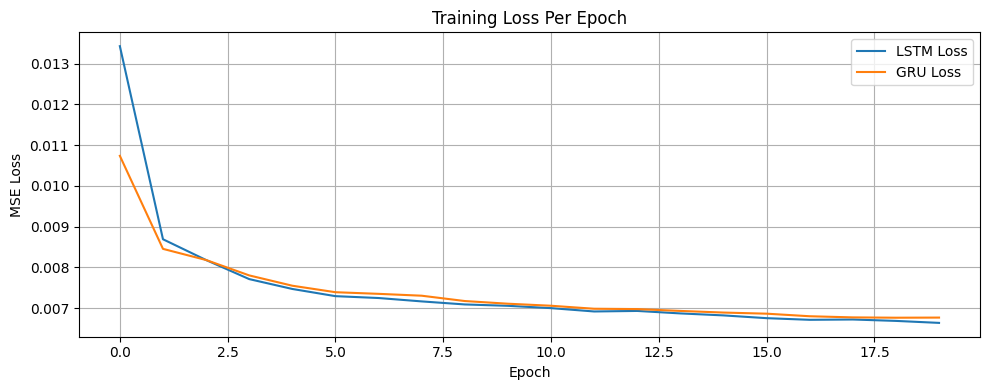

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(lstm_losses, label="LSTM Loss")
plt.plot(gru_losses, label="GRU Loss")
plt.title("Training Loss Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Validation MAE Per Epoch


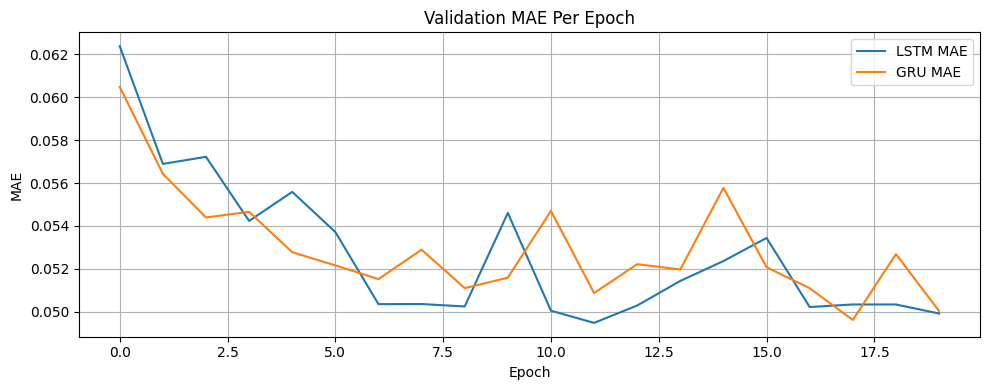

In [53]:
plt.figure(figsize=(10, 4))
plt.plot(lstm_maes, label="LSTM MAE")
plt.plot(gru_maes, label="GRU MAE")
plt.title("Validation MAE Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Comparative Predictions For first 200 instances

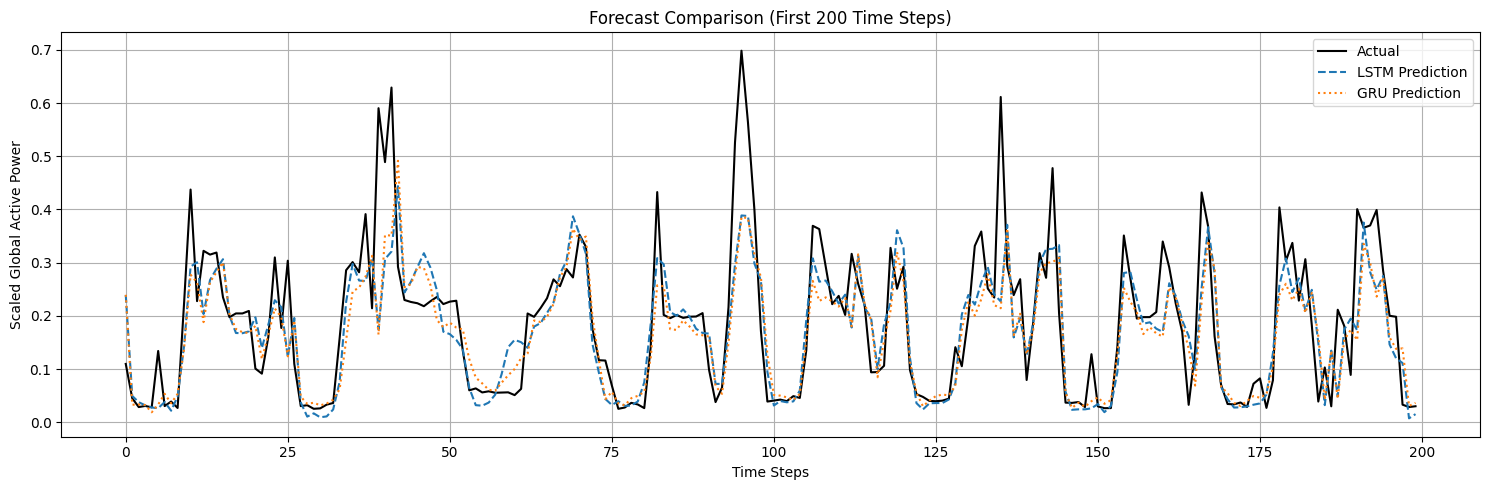

In [54]:
plt.figure(figsize=(15, 5))
plt.plot(y_true[:200], label="Actual", color="black")
plt.plot(lstm_preds[:200], label="LSTM Prediction", linestyle='--')
plt.plot(gru_preds[:200], label="GRU Prediction", linestyle=':')
plt.title("Forecast Comparison (First 200 Time Steps)")
plt.xlabel("Time Steps")
plt.ylabel("Scaled Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#MAE and RMSE Bar Charts

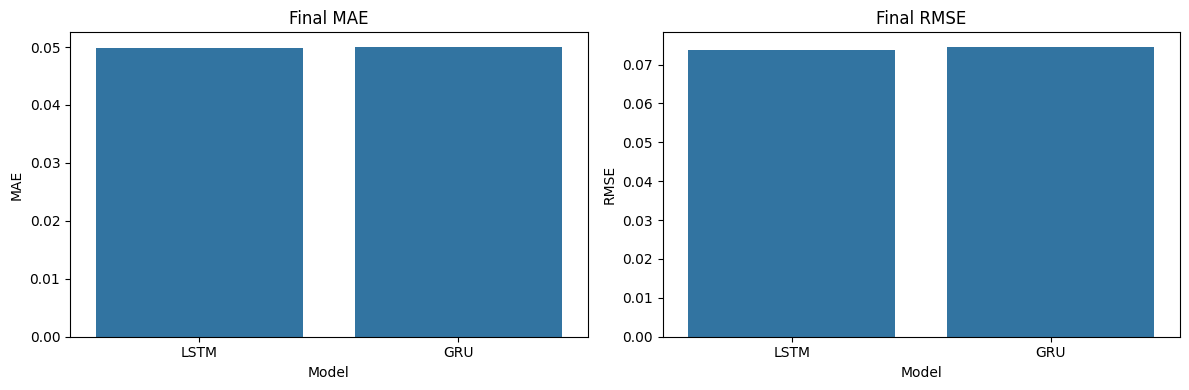

In [55]:
final_metrics = pd.DataFrame({
    "Model": ["LSTM", "GRU"],
    "MAE": [lstm_maes[-1], gru_maes[-1]],
    "RMSE": [lstm_rmses[-1], gru_rmses[-1]]
})

# Plot MAE and RMSE side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=final_metrics, x="Model", y="MAE", ax=axs[0])
axs[0].set_title("Final MAE")
sns.barplot(data=final_metrics, x="Model", y="RMSE", ax=axs[1])
axs[1].set_title("Final RMSE")
plt.tight_layout()
plt.show()
